[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


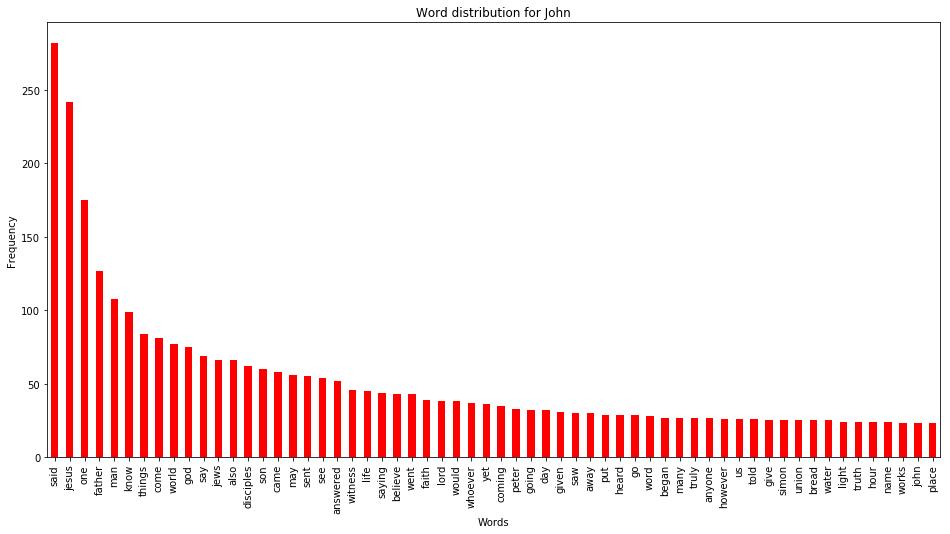

In [1]:
# get corpus
doc = open('John.txt')
doc = doc.read()

# Clean data
from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
jotxt = ''.join(c for c in doc if not c.isdigit())
jotxt = ''.join(c for c in jotxt if c not in punctuation)
jotxt = ''.join(c for c in jotxt if c not in ['”','“','’','‘', '——', '—']).lower()
jotxt = ' '.join(c for c in jotxt.split() if c not in stopwords.words('english'))

# Get word count
nltk.download('punkt')
from nltk.probability import FreqDist
words = nltk.tokenize.word_tokenize(jotxt)
freqdis = FreqDist(words)
import pandas as pd
count_frame = pd.DataFrame(freqdis, index = [0]).T
count_frame.columns = ['Counts']
joncounts = count_frame.sort_values('Counts', ascending = False)

# Plot the distribution for top 60 words
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (16,8))
ax = fig.gca()
joncounts.Counts[:60].plot(kind = 'bar', ax = ax, color = 'r')
ax.set_title('Word distribution for John')
ax.set_ylabel('Frequency')
ax.set_xlabel('Words')
plt.show()

In [2]:
joncounts.loc[['jehovah', 'jesus', 'kingdom'],'Counts'].sort_values(ascending = False)

jesus      242
kingdom      5
jehovah      4
Name: Counts, dtype: int64